In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import model_selection,preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,LabelBinarizer
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.naive_bayes import MultinomialNB
from gensim.sklearn_api import D2VTransformer
from sklearn.model_selection import cross_val_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats
from scipy.stats import randint
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifierCV
import multiprocessing
import gensim
from gensim.models.doc2vec import TaggedDocument
cores = multiprocessing.cpu_count()
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils
import numpy as np

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool


ModuleNotFoundError: No module named 'catboost'

In [4]:
df = pd.read_csv("../../cleandatatrain.csv")
#ff = pd.read_csv("text_emotion.csv")

FileNotFoundError: [Errno 2] File b'../../cleandatatrain.csv' does not exist: b'../../cleandatatrain.csv'

In [ ]:
df.rename(columns = {'emotions':'label'},inplace = True)

In [ ]:
df.dropna(subset=['statement_clean'],inplace=True)

In [2]:
df.columns()

NameError: name 'df' is not defined

In [19]:
def stem_text(word_list):  #Lemmatize text
    new_list = []
    for word in word_list:
        wl = PorterStemmer()
        rootword=wl.stem(word)
        new_list.append(rootword)
    return new_list


def remove_stopwords(row):     #Remove Stopwords from text
    tokens = word_tokenize(row)
    filtered_word = [word for word in tokens if not word in stop_words]
    #stemmed_text = stem_text(filtered_word)
    #return stemmed_text
    return filtered_word

def make_string(row):      #Convert list into string
    new = ''
    for word in row:
        new = new + word
        new = new + ' '
    return new


def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    return text

df['statement_clean'] = ''
df['statement_clean'] = df['text'].apply(lambda x: x.lower())
df['statement_clean'] = df['statement_clean'].map(lambda x:clean_text(x))
stop_words = set(stopwords.words('english'))
df['statement_clean'] = df['statement_clean'].apply(remove_stopwords)
df['statement_clean'] = df['statement_clean'].apply(make_string)
df['statement_clean'].replace(to_replace = '[^\w\s]',value='',inplace = True,regex = True )  #Remove punctuation
df['statement_clean'].replace(to_replace = '[\d]',value='',inplace = True,regex = True )     #Remove digits
df['statement_clean'] = df['statement_clean'].apply(lambda x:" ".join(x.split()))            #Remove duplicate white spaces
df['statement_clean'] = df['statement_clean'].apply(lambda x:" ".join(word for word in x.split(' ') if len(word) > 2))   #Remove single letter words
print(df['statement_clean'])


1           know west teams play west teams east teams right
2          underdogs earlier today since gronk announceme...
3                        meme funny none new york nigga ones
4                                        could use one tools
5          pay attention long legal would kick bed took load
6                               trick treating general weird
7                                blade mastery masamune gtfo
8                                  good build buy games save
9                                       would love see lolla
10         think significant amount would spending tax do...
11                                      damn hoping god real
12                                                    agenda
13                                                great idea
14                        ayy wassup makes bit sense context
15                                                      fuck
16                                                     noted
17                      

In [20]:
encoder = preprocessing.LabelEncoder()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['statement_clean'],df['label'])

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),min_df=3)
#tfidf_vect.fit(df['statement_clean'])
xtrain_tfidf = tfidf_vect.fit_transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)




In [69]:
list(train_y)

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,


In [21]:
df.label.unique()

array([0, 1])

[('everyon', 'privileg', 'sexist', 'rape', 'still', 'dare', 'sure', 'fault', 'right', 'must', 'women', 'white', 'thank', 'drop', 'clearli', 'racist', 'total', 'obvious', 'yeah', 'forgot'), (319.69781862941056, 326.7966155343083, 333.9693396440872, 339.2763954917009, 351.1519494931719, 394.66344674493564, 415.0666665297531, 444.27003128191325, 470.6091816122622, 566.7165632587185, 567.8248055800727, 578.9227727428724, 680.3497216161745, 896.9332384625081, 1150.0806552281224, 1218.5111238328886, 1280.3876056691665, 1756.0921944587994, 2439.004548254183, 4038.5970843279592)]


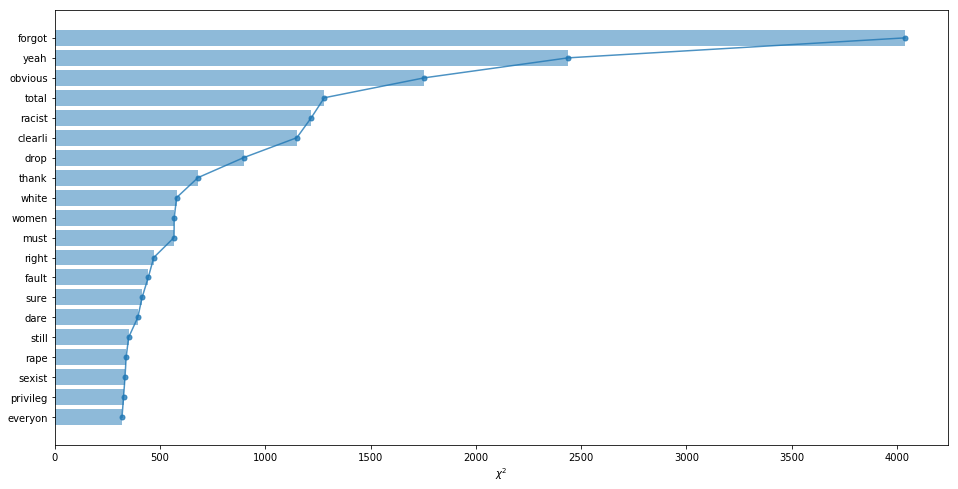

In [13]:
chi2score=chi2(xtrain_tfidf,train_y)[0]
plt.figure(figsize=(16,8))
scores = list(zip(tfidf_vect.get_feature_names(), chi2score))
chi2_ = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2_[-20:]))
print(topchi2)
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show()

In [49]:
chi2_features = SelectKBest(chi2, k = 10000) 
xtrain_tfidf = chi2_features.fit_transform(xtrain_tfidf, train_y) 
xvalid_tfidf = chi2_features.transform(xvalid_tfidf)

In [22]:
params = {
    
    'solver': 'lbfgs'
}

lgbm_params = {
    'n_estimators': 250,
    'max_depth': 10,
    'learning_rate': 0.03,
    'objective': 'binary',
    'n_jobs': cores,
    'boosting_type':'dart',
    'num_leaves':1024,
    
    
}

#test_data = catboost_pool = Pool(xtrain_tfidf, 
                                 #train_y)
#clf = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.05,
                           #loss_function='CrossEntropy',
                           #verbose=True)

#clf = LGBMClassifier(**lgbm_params)
clf = LogisticRegression(**params)
#clf = SVC()
#clf = MultinomialNB().fit(xtrain_tfidf.toarray(),train_y)
#clf = XGBClassifier()
clf.fit(xtrain_tfidf, train_y)
print(clf)

#clf = MultinomialNB().fit(xtrain_tfidf.toarray(),train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [23]:
predictions = clf.predict(xvalid_tfidf)
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(valid_y, predictions)
print ('Accuracy Score :',accuracy_score(valid_y, predictions))
print ('Report : ')
print (classification_report(valid_y,predictions))

Accuracy Score : 0.6889257552483359
Report : 
              precision    recall  f1-score   support

           0       0.67      0.71      0.69    120164
           1       0.71      0.67      0.68    123961

   micro avg       0.69      0.69      0.69    244125
   macro avg       0.69      0.69      0.69    244125
weighted avg       0.69      0.69      0.69    244125



In [47]:
from sklearn.externals import joblib 
joblib.dump(clf, 'sarcasmlogit68%.pkl') 

['sarcasmlogit68%.pkl']

In [2]:
from sklearn.externals import joblib 
clf = joblib.load('catboost63%.pkl')

In [59]:
ff = pd.read_csv("finaldataset3rd-1.csv")

In [60]:
def stem_text(word_list):  #Lemmatize text
    new_list = []
    for word in word_list:
        wl = PorterStemmer()
        rootword=wl.stem(word)
        new_list.append(rootword)
    return new_list


def remove_stopwords(row):     #Remove Stopwords from text
    tokens = word_tokenize(row)
    filtered_word = [word for word in tokens if not word in stop_words]
    #stemmed_text = stem_text(filtered_word)
    #return stemmed_text
    return filtered_word

def make_string(row):      #Convert list into string
    new = ''
    for word in row:
        new = new + word
        new = new + ' '
    return new


def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    return text

ff['statement_clean'] = ''
ff['statement_clean'] = ff['headline'].apply(lambda x: x.lower())
ff['statement_clean'] = ff['statement_clean'].map(lambda x:clean_text(x))
stop_words = set(stopwords.words('english'))
ff['statement_clean'] = ff['statement_clean'].apply(remove_stopwords)
ff['statement_clean'] = ff['statement_clean'].apply(make_string)
ff['statement_clean'].replace(to_replace = '[^\w\s]',value='',inplace = True,regex = True )  #Remove punctuation
ff['statement_clean'].replace(to_replace = '[\d]',value='',inplace = True,regex = True )     #Remove digits
ff['statement_clean'] = ff['statement_clean'].apply(lambda x:" ".join(x.split()))            #Remove duplicate white spaces
ff['statement_clean'] = ff['statement_clean'].apply(lambda x:" ".join(word for word in x.split(' ') if len(word) > 3))   #Remove single letter words
print(ff['statement_clean'])

0        house aide even comey letter jason chaffetz tw...
1             flynn hillary clinton woman campus breitbart
2                                        truth might fired
3             civilians killed single airstrike identified
4        iranian woman jailed fictional unpublished sto...
5        jackie mason hollywood would love trump bombed...
6        life life luxury elton john favorite shark pic...
7        beno hamon wins french socialist party preside...
8        excerpts draft script donald trump ampa black ...
9        back channel plan ukraine russia courtesy trum...
10       obama organizing action partners soros linked ...
11       comedy sketch real housewives isis causes outrage
12       russian researchers discover secret nazi milit...
13                             officials link trump russia
14       paid government trolls social media blogs foru...
15       major league soccer argentines find home succe...
16             wells fargo chief abruptly steps york tim

In [61]:

xtest = tfidf_vect.transform(ff['statement_clean'])
preds = clf.predict(xtest)

In [62]:
preds

array([0, 1, 0, ..., 0, 0, 1])

In [63]:
ff['sarcasm_new'] = pd.Series(preds)

In [64]:
ff['sarcasm_new'] = ff['sarcasm_new'].astype(str)

In [65]:
ff['sarcasm_new']=ff['sarcasm_new'].replace('0','not_sarcastic').replace('1','sarcastic')

In [66]:
ff

,index,id,headline,author,news,label,statement_clean,emotion_new,sarcasm_new
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house aide even comey letter jason chaffetz tw...,sadness,not_sarcastic
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton woman campus breitbart,anger,sarcastic
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might fired,joy,not_sarcastic
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilians killed single airstrike identified,love,sarcastic
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...,anger,sarcastic
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,jackie mason hollywood would love trump bombed...,love,sarcastic
6,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,life life luxury elton john favorite shark pic...,joy,not_sarcastic
7,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,beno hamon wins french socialist party preside...,sadness,sarcastic
8,8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,excerpts draft script donald trump ampa black ...,joy,sarcastic
9,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,back channel plan ukraine russia courtesy trum...,anger,sarcastic


In [67]:
ff.to_csv("finaldataset3rd-2.csv",index=False)

In [31]:
xf = pd.read_csv("finaldataset2.csv")

In [32]:
xf.columns

Index(['index', 'title', 'label', 'statement_clean', 'emotion_new',
       'hate_new'],
      dtype='object')

In [42]:
ff

,index,title,label,statement_clean,emotion_new,sarcasm_new
0,0,Way Too Fucking Soon: The Cast Of ‘Angie Tribe...,FAKE,fuck soon cast angi tribeca came togeth incred...,anger,not_sarcastic
1,1,'Are You The Whistleblower?' Trump Boys Ask Wh...,FAKE,whistleblow trump white hous janitor give seru...,love,sarcastic
2,2,New Pumpkin Spice Channel To Offer Fall-Themed...,FAKE,pumpkin spice channel offer fall theme hardcor...,anger,not_sarcastic
3,3,The Onion called it: America Needs a Moat (......,FAKE,onion call america need moat fill allig,anger,not_sarcastic
4,4,Mother Feels Violent Desire To Make Front Door...,FAKE,mother feel violent desir make front doorway r...,anger,not_sarcastic
5,5,Police Union Decries Egregious Carriage Of Jus...,FAKE,polic union decri egregi carriag justic amber ...,anger,not_sarcastic
6,6,Nutritionists Report They Wouldn’t Have To Fig...,FAKE,nutritionist report figur food american normal,sadness,sarcastic
7,7,15 Episodes Of ‘Seinfeld’ When Jerry Dated A W...,FAKE,episod seinfeld jerri date woman hand,sadness,not_sarcastic
8,8,my dude really ate the onion here. Kraft singl...,FAKE,dude realli onion kraft singl movi theatr,love,not_sarcastic
9,9,"Ah yes, there's nothing I love more than buyin...",FAKE,noth love kraft slice local theater,love,not_sarcastic


In [43]:
xf['sarcasm_new'] = ff['sarcasm_new']

In [45]:
xf.to_csv("../../onionfinal.csv",index=False)